# 使用xgboost模型，当前得分0.81944

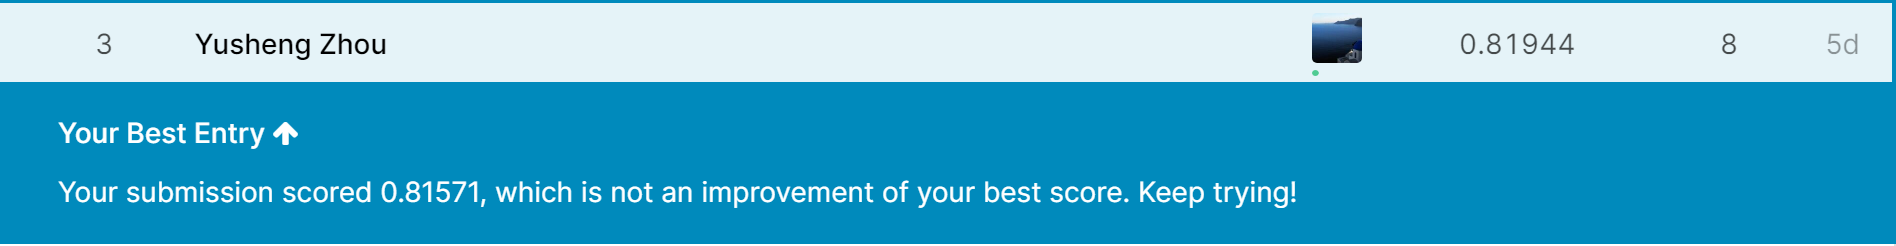

In [1]:
# 从sklearn 调入所需要的包
# from sklearn import datasets
from sklearn.model_selection import train_test_split #数据分隔出训练集和验证集
import lightgbm as lgb
import numpy as np
import pandas as pd
#导入精度和召回
from sklearn.metrics import precision_score, recall_score
import lightgbm as lgb

In [2]:
path='./'
train = pd.read_csv(path+'input/train.csv')
test = pd.read_csv(path+'input/test.csv')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [25]:
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [4]:
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [10]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [4]:
train.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,...,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,...,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [5]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000,10852.000000
mean,30743.500000,41.040638,1393.157298,15.680151,257.206137,2.770365,39.954755,0.546443
std,3132.846895,10.652369,3318.497101,8.302317,250.480906,3.063481,99.524056,1.805938
min,25318.000000,18.000000,-2604.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,28030.750000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,30743.500000,39.000000,450.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,33456.250000,49.000000,1440.250000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,36169.000000,94.000000,81204.000000,31.000000,3102.000000,58.000000,871.000000,51.000000


In [10]:
train

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,763,34,0,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,...,4,80,1,1,2,3,1,1,0,0
1172,835,35,0,Travel_Rarely,528,Human Resources,8,4,Technical Degree,1,...,2,80,0,6,2,1,5,4,1,4
1173,1216,43,0,Travel_Rarely,1179,Sales,2,3,Medical,1,...,1,80,1,10,3,3,10,9,8,8
1174,559,38,0,Travel_Rarely,268,Research & Development,2,5,Medical,1,...,2,80,1,6,0,1,1,0,0,1


In [ ]:
'StandardHours',EmployeeCount

In [31]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [32]:
train.corr()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
user_id,1.000000,0.009300,-0.009329,-0.041355,0.029618,0.058138,NaN,0.999906,0.042355,0.014785,...,-0.064190,NaN,0.041794,-0.008958,-0.018542,0.006358,-0.019605,-0.019685,-0.016308,-0.025553
Age,0.009300,1.000000,-0.175754,0.016997,-0.006119,0.201116,NaN,0.009602,0.016010,0.035942,...,0.059735,NaN,0.045595,0.686609,-0.014888,-0.018682,0.317604,0.220128,0.213677,0.204173
Attrition,-0.009329,-0.175754,1.000000,-0.065743,0.072157,-0.033683,NaN,-0.009786,-0.095627,-0.003484,...,-0.034985,NaN,-0.129769,-0.181079,-0.056043,-0.073935,-0.141555,-0.169024,-0.042846,-0.163825
DailyRate,-0.041355,0.016997,-0.065743,1.000000,-0.013230,-0.013333,NaN,-0.040680,0.013415,0.024577,...,0.000101,NaN,0.045414,0.022416,0.000097,-0.017483,-0.021911,0.027265,-0.015516,-0.002437
DistanceFromHome,0.029618,-0.006119,0.072157,-0.013230,1.000000,-0.005039,NaN,0.029432,-0.013182,0.024524,...,0.028912,NaN,0.056862,-0.005337,-0.051527,-0.010663,-0.003907,0.015311,-0.005778,0.014304
Education,0.058138,0.201116,-0.033683,-0.013333,-0.005039,1.000000,NaN,0.058453,-0.038378,0.004381,...,0.000446,NaN,0.016850,0.148434,-0.016419,0.026454,0.070153,0.063850,0.043986,0.063246
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,0.009602,-0.009786,-0.040680,0.029432,0.058453,NaN,1.000000,0.042183,0.015261,...,-0.064441,NaN,0.041471,-0.009325,-0.018590,0.005984,-0.019196,-0.019196,-0.016330,-0.025114
EnvironmentSatisfaction,0.042355,0.016010,-0.095627,0.013415,-0.013182,-0.038378,NaN,0.042183,1.000000,-0.048388,...,0.018885,NaN,-0.002740,-0.004375,-0.014442,0.038081,-0.003979,0.028714,0.016720,-0.008952
HourlyRate,0.014785,0.035942,-0.003484,0.024577,0.024524,0.004381,NaN,0.015261,-0.048388,1.000000,...,0.008333,NaN,0.039087,0.000532,-0.023348,-0.012992,-0.011851,-0.011254,-0.001080,-0.021674


In [6]:
train.job.value_counts()

AttributeError: 'DataFrame' object has no attribute 'job'

In [12]:
train.shape

(25317, 18)

In [7]:
train.shape

(1176, 36)

In [13]:
test.shape

(10852, 17)

In [5]:
train

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,763,34,No,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,...,4,80,1,1,2,3,1,1,0,0
1172,835,35,No,Travel_Rarely,528,Human Resources,8,4,Technical Degree,1,...,2,80,0,6,2,1,5,4,1,4
1173,1216,43,No,Travel_Rarely,1179,Sales,2,3,Medical,1,...,1,80,1,10,3,3,10,9,8,8
1174,559,38,No,Travel_Rarely,268,Research & Development,2,5,Medical,1,...,2,80,1,6,0,1,1,0,0,1


In [3]:
test['Attrition']=-1
print(len(test.columns))

36


In [4]:
test.Attrition.dtype

dtype('int64')

In [4]:
train.loc[train['Attrition']=='Yes','Attrition'] = 1

In [5]:
train.loc[train['Attrition']=='No','Attrition'] = 0

In [6]:
# data[i] = data[i].astype('category')
train['Attrition'] = train['Attrition'].astype('int64')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   int64 
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [7]:
# data = train.append(test).reset_index(drop=True)
data = pd.concat([train,test]).reset_index(drop=True)
data

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1439,36,-1,Travel_Rarely,557,Sales,3,3,Medical,1,...,3,80,2,10,2,3,9,7,3,4
1466,481,34,-1,Travel_Rarely,254,Research & Development,1,2,Life Sciences,1,...,4,80,1,6,3,3,6,5,1,3
1467,124,31,-1,Travel_Rarely,249,Sales,6,4,Life Sciences,1,...,2,80,0,12,3,2,7,7,7,7
1468,198,38,-1,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,...,2,80,0,14,3,3,1,0,0,0


In [9]:
data.drop(['EmployeeNumber'], axis=1, inplace=True)

In [10]:
data.drop(['StandardHours'], axis=1, inplace=True)

In [11]:
data

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,3,1,29,2,2,1,0,0,0
1,1092,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,4,1,8,3,3,5,4,0,3
2,768,40,0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,3,2,1,8,3,2,7,7,7,5
3,569,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,3,2,0,10,1,3,10,7,0,9
4,911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,3,4,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1439,36,-1,Travel_Rarely,557,Sales,3,3,Medical,1,...,3,3,2,10,2,3,9,7,3,4
1466,481,34,-1,Travel_Rarely,254,Research & Development,1,2,Life Sciences,1,...,3,4,1,6,3,3,6,5,1,3
1467,124,31,-1,Travel_Rarely,249,Sales,6,4,Life Sciences,1,...,3,2,0,12,3,2,7,7,7,7
1468,198,38,-1,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,...,3,2,0,14,3,3,1,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   int64 
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [8]:
path='./'
import os
import json
import gc
# os.system('pip install numba')
from numba import jit
#tqdm
# os.system('pip install tqdm')
from tqdm import tqdm_notebook
from tqdm import tqdm

#Integrated model
# os.system('pip install lightgbm')
import lightgbm as lgb
# os.system('pip install catboost==0.15.2')
import catboost as cbt
# os.system('pip install xgboost')
# import xgboost as xgb

#base import 
import numpy as np
import pandas as pd

# about sklearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as std
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score
#about time
import time
import datetime 
from datetime import datetime, timedelta

#Garbage collection
import gc
# scipy
from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
import scipy.spatial.distance as dist
#other
from collections import Counter 
from statistics import mode 
    #warning
import warnings
warnings.filterwarnings("ignore")
import json 
import math
from itertools import product
import ast 

In [13]:
data

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,3,1,29,2,2,1,0,0,0
1,1092,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,4,1,8,3,3,5,4,0,3
2,768,40,0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,3,2,1,8,3,2,7,7,7,5
3,569,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,3,2,0,10,1,3,10,7,0,9
4,911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,3,4,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1439,36,-1,Travel_Rarely,557,Sales,3,3,Medical,1,...,3,3,2,10,2,3,9,7,3,4
1466,481,34,-1,Travel_Rarely,254,Research & Development,1,2,Life Sciences,1,...,3,4,1,6,3,3,6,5,1,3
1467,124,31,-1,Travel_Rarely,249,Sales,6,4,Life Sciences,1,...,3,2,0,12,3,2,7,7,7,7
1468,198,38,-1,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,...,3,2,0,14,3,3,1,0,0,0


In [9]:
cat_col = [i for i in data.select_dtypes(object).columns if i not in ['user_id','Attrition']]

for i in tqdm_notebook(cat_col):
    lbl = LabelEncoder()
# #     data['count_' + i] = data.groupby([i])[i].transform('count')
    data[i] = lbl.fit_transform(data[i].astype(str))

In [15]:
data

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,2,605,2,21,3,1,1,...,3,3,1,29,2,2,1,0,0,0
1,1092,45,0,2,950,1,28,3,5,1,...,4,4,1,8,3,3,5,4,0,3
2,768,40,0,2,300,2,26,3,2,1,...,3,2,1,8,3,2,7,7,7,5
3,569,36,0,0,1434,2,8,4,1,1,...,3,2,0,10,1,3,10,7,0,9
4,911,25,1,1,599,2,24,1,1,1,...,3,4,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1439,36,-1,2,557,2,3,3,3,1,...,3,3,2,10,2,3,9,7,3,4
1466,481,34,-1,2,254,1,1,2,1,1,...,3,4,1,6,3,3,6,5,1,3
1467,124,31,-1,2,249,2,6,4,1,1,...,3,2,0,12,3,2,7,7,7,7
1468,198,38,-1,2,1261,1,2,4,1,1,...,3,2,0,14,3,3,1,0,0,0


In [11]:
# for i in cat_col:
#     data[i] = data[i].astype('category')

In [10]:
feats = [i for i in data.columns if i not in ['user_id','Attrition']]
feats

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
import numpy as np

max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))
for i in feats:
    data[i]=data[[i]].apply(max_min_scaler)

In [19]:
data

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,0.952381,0,1.0,0.360057,1.0,0.714286,0.50,0.2,NaN,...,0.0,0.666667,0.333333,0.725,0.333333,0.333333,0.025,0.000000,0.000000,0.000000
1,1092,0.642857,0,1.0,0.607015,0.5,0.964286,0.50,1.0,NaN,...,1.0,1.000000,0.333333,0.200,0.500000,0.666667,0.125,0.222222,0.000000,0.176471
2,768,0.523810,0,1.0,0.141732,1.0,0.892857,0.50,0.4,NaN,...,0.0,0.333333,0.333333,0.200,0.500000,0.333333,0.175,0.388889,0.466667,0.294118
3,569,0.428571,0,0.0,0.953472,1.0,0.250000,0.75,0.2,NaN,...,0.0,0.333333,0.000000,0.250,0.166667,0.666667,0.250,0.388889,0.000000,0.529412
4,911,0.166667,1,0.5,0.355762,1.0,0.821429,0.00,0.2,NaN,...,0.0,1.000000,0.000000,0.025,0.666667,0.666667,0.025,0.000000,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1439,0.428571,-1,1.0,0.325698,1.0,0.071429,0.50,0.6,NaN,...,0.0,0.666667,0.666667,0.250,0.333333,0.666667,0.225,0.388889,0.200000,0.235294
1466,481,0.380952,-1,1.0,0.108805,0.5,0.000000,0.25,0.2,NaN,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.150,0.277778,0.066667,0.176471
1467,124,0.309524,-1,1.0,0.105225,1.0,0.178571,0.75,0.2,NaN,...,0.0,0.333333,0.000000,0.300,0.500000,0.333333,0.175,0.388889,0.466667,0.411765
1468,198,0.476190,-1,1.0,0.829635,0.5,0.035714,0.75,0.2,NaN,...,0.0,0.333333,0.000000,0.350,0.500000,0.666667,0.025,0.000000,0.000000,0.000000


In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.08,
                      n_estimators=300,         # 树的个数--300棵树建立xgboost
                      max_depth=3,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.3,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      colsample_btree=0.8,       # 随机选择80%特征建立决策树
                      objective='binary:logistic', # 指定损失函数
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27            # 随机数
                      )

In [13]:
data1 =data[data['Attrition']!=-1][feats]
label1 =data[data['Attrition']!=-1]['Attrition']
testx= data[data['Attrition']==-1][feats]

In [19]:
train_x, test_x, train_y, test_y = train_test_split(data1, label1, test_size=0.3, random_state=42)
model.fit(train_x,train_y,eval_metric='auc',eval_set=[(train_x, train_y),(test_x, test_y)],early_stopping_rounds=231)
test_pre = model.predict_proba(testx)[:,1]#, num_iteration=model.best_iteration

[11:28:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_btree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.75490	validation_1-auc:0.69628
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 231 rounds.
[1]	validation_0-auc:0.77260	validation_1-auc:0.73796
[2]	validation_0-auc:0.78946	validation_1-auc:0.74182
[3]	validation_0-auc:0.82248	validation_1-auc:0.75013
[4]	validation_0-auc:0.83086	validation_1-auc:0.74847
[5]	validation_0-auc:0.84447	validation_1-auc:0.74604
[6]	validation_0-auc:0.84752	validation_1-auc:0.75029
[7]	validation_0-auc:0.85116	validation_1-auc:0.75578
[8]	validation_0-

In [16]:
test_pre

array([0.05156057, 0.05159634, 0.09170836, 0.08669118, 0.71679911,
       0.18779496, 0.48357816, 0.03157045, 0.02570339, 0.16633937,
       0.03202088, 0.25811205, 0.04265133, 0.64964572, 0.06586367,
       0.01315453, 0.04480904, 0.05769646, 0.03664752, 0.15710439,
       0.67159932, 0.06307201, 0.03107177, 0.02615956, 0.23378223,
       0.18724824, 0.04051908, 0.02870892, 0.59518669, 0.02541439,
       0.02014252, 0.04315917, 0.14081975, 0.08596478, 0.03352067,
       0.02682463, 0.10305614, 0.07077047, 0.05720926, 0.05417808,
       0.05674894, 0.0717973 , 0.06415014, 0.07194091, 0.05254308,
       0.43171326, 0.1936467 , 0.03337491, 0.74021111, 0.31471886,
       0.11293298, 0.23826505, 0.05770435, 0.08941195, 0.41187277,
       0.05739856, 0.03158168, 0.06496   , 0.01914905, 0.27027063,
       0.02779915, 0.10094305, 0.02802784, 0.07468961, 0.26241613,
       0.05879041, 0.09617592, 0.03798047, 0.06763417, 0.05963827,
       0.06539715, 0.15970149, 0.05481354, 0.03239109, 0.02951

In [20]:
res=data[data['Attrition']==-1][['user_id']]
res['Attrition'] = test_pre

In [21]:
res

,user_id,Attrition
1176,442,0.098802
1177,1091,0.075760
1178,981,0.091652
1179,785,0.114376
1180,1332,0.843049
...,...,...
1465,1439,0.048095
1466,481,0.068604
1467,124,0.182645
1468,198,0.039690


In [27]:
len(res[res['Attrition']>0.5])

16

In [86]:
# res.loc[res['pred']!='Yes','pred']='No'

In [20]:
res.Attrition.value_counts()

0.050885    1
0.526917    1
0.063105    1
0.064363    1
0.050913    1
           ..
0.086145    1
0.220473    1
0.202025    1
0.596310    1
0.050653    1
Name: Attrition, Length: 294, dtype: int64

In [21]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1176 to 1469
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    294 non-null    int64  
 1   Attrition  294 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.9 KB


In [27]:
res[['user_id','Attrition']]

,user_id,Attrition
1176,442,0.051561
1177,1091,0.051596
1178,981,0.091708
1179,785,0.086691
1180,1332,0.716799
...,...,...
1465,1439,0.036728
1466,481,0.032277
1467,124,0.234551
1468,198,0.022152


In [23]:
res.to_csv(path + 'output/xgb_drop_baseline.csv',index=False )

In [14]:
#5折交叉验证
from sklearn.model_selection import KFold,StratifiedKFold
n_splits=5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)


train_x = data[data['Attrition']!=-1][feats]
train_y = data[data['Attrition']!=-1]['Attrition']


res=data[data['Attrition']==-1][['user_id']]
res['Attrition'] = 0


test_x= data[data['Attrition']==-1][feats]

for train_idx, val_idx in kfold.split(train_x):
    model.random_state = model.random_state + 1
    train_x1 = train_x.loc[train_idx]
    train_y1 = train_y.loc[train_idx]
    test_x1 = train_x.loc[val_idx]
    test_y1 = train_y.loc[val_idx]
    #,(vali_x,vali_y)
    model.fit(train_x1, train_y1,eval_set=[(train_x1, train_y1),(test_x1, test_y1)],eval_metric='auc')
    print('******************************************************')
    res['Attrition'] += model.predict_proba(test_x)[:,1]
    



[09:04:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_btree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.74818	validation_1-auc:0.67505
[1]	validation_0-auc:0.75192	validation_1-auc:0.67887
[2]	validation_0-auc:0.80114	validation_1-auc:0.69699
[3]	validation_0-auc:0.82337	validation_1-auc:0.69988
[4]	validation_0-auc:0.83491	validation_1-auc:0.69824
[5]	validation_0-auc:0.84853	validation_1-auc:0.73300
[6]	validation_0-auc:0.84549	validation_1-auc:0.73038
[7]	validation_0-auc:0.84985	validation_1-auc:0.74664
[8]	validation_0-auc:0.85482	validation_1-auc:0.75243
[9]	validation_0-auc:0.85212	validation_1-auc:0.75145
[10]	validation_0-auc:0.85153	validation_1-auc:0.75592
[11]	validat

In [15]:
res[res['Attrition']>0.5]

,user_id,Attrition
1179,785,0.565794
1180,1332,4.595156
1181,501,1.123582
1182,1058,1.499860
1185,122,0.535860
...,...,...
1455,505,0.741211
1456,443,2.012967
1458,516,0.713707
1463,985,0.833326


In [16]:
res['Attrition'] = res['Attrition']/n_splits

In [17]:
len(res[res['Attrition']>0.5])

18

In [18]:
res.to_csv('./output/xgb_maxminscalar_notdrop_5fold.csv', index=False)

In [23]:
train_y.shape

(25317,)